### Desglose detallado del código de predicción de presión arterial sistólica

**1. Importación de librerías**

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm

**¿Qué hace cada una?** 
-  pandas: Manipulación y análisis de datos, principalmente con DataFrames. 
-  numpy: Operaciones matemáticas eficientes con arrays. 
-  matplotlib.pyplot: Gráficos básicos en Python. 
-  seaborn: Visualizaciones estadísticas avanzadas y estéticas. 
-  sklearn.model_selection.train_test_split: División de datos en 
entrenamiento y prueba. 
-  sklearn.linear_model.LinearRegression: Implementación de regresión 
lineal. 
-  sklearn.metrics.mean_squared_error: Cálculo del error cuadrático medio. 
-  sklearn.metrics.r2_score: Cálculo del coeficiente de determinación R². 
-  statsmodels.api.sm: Modelado estadístico avanzado.

**2. Configuración visual y semilla aleatoria**

In [11]:
plt.style.use('seaborn-v0_8') # Aplica el estilo de visualización de Seaborn a matplotlib. 
np.random.seed(42) # Fija una semilla para reproducibilidad de resultados aleatorios. 

**3. Generación de datos simulados**

In [12]:
def generar_datos_pa(n=300): 
    edad = np.random.randint(18, 81, size=n)  # Genera edades entre 18 y 80.
    imc = np.random.normal(27, 4, size=n) # Genera valores de IMC con media 27 y desviación estándar 4.
    imc = np.clip(imc, 18, 38) # Restringe el IMC entre 18 y 38.
    colesterol = np.random.normal(200, 35, size=n) # Niveles de colesterol con media 200 y desviación estándar 35.
    colesterol = np.clip(colesterol, 130, 300) # Restringe el colesterol entre 130 y 300.
    pa_sistolica = 100 + 0.6 * edad + 0.8 * imc + 0.15 * colesterol + np.random.normal(0, 8, size=n) # Calcula la presión arterial sistólica con un modelo lineal y añde ruido.
    return pd.DataFrame({'edad': edad, 'imc': imc, 'colesterol': colesterol, 'pa_sistolica': pa_sistolica})

**4. Exploración de datos**

In [13]:
df = generar_datos_pa(300) 
print(df.head()) # Muestra las primeras filas.
print(df.describe()) # Estadísticas descriptivas de las columnas.

   edad        imc  colesterol  pa_sistolica
0    56  26.861153  254.290319    194.146291
1    69  22.325288  204.048612    191.069936
2    46  31.571291  241.275401    186.139446
3    32  30.007732  202.363147    173.105093
4    60  30.164128  272.126177    203.412643
             edad         imc  colesterol  pa_sistolica
count  300.000000  300.000000  300.000000    300.000000
mean    50.533333   27.206266  198.822245    182.872518
std     18.916881    3.777005   35.429746     14.726392
min     18.000000   18.000000  130.000000    145.989673
25%     34.000000   24.213602  173.193792    172.208511
50%     51.500000   27.315357  197.930384    183.463277
75%     67.250000   29.665990  222.666818    193.192963
max     80.000000   38.000000  300.000000    219.514623


**5. Visualización de distribuciones**

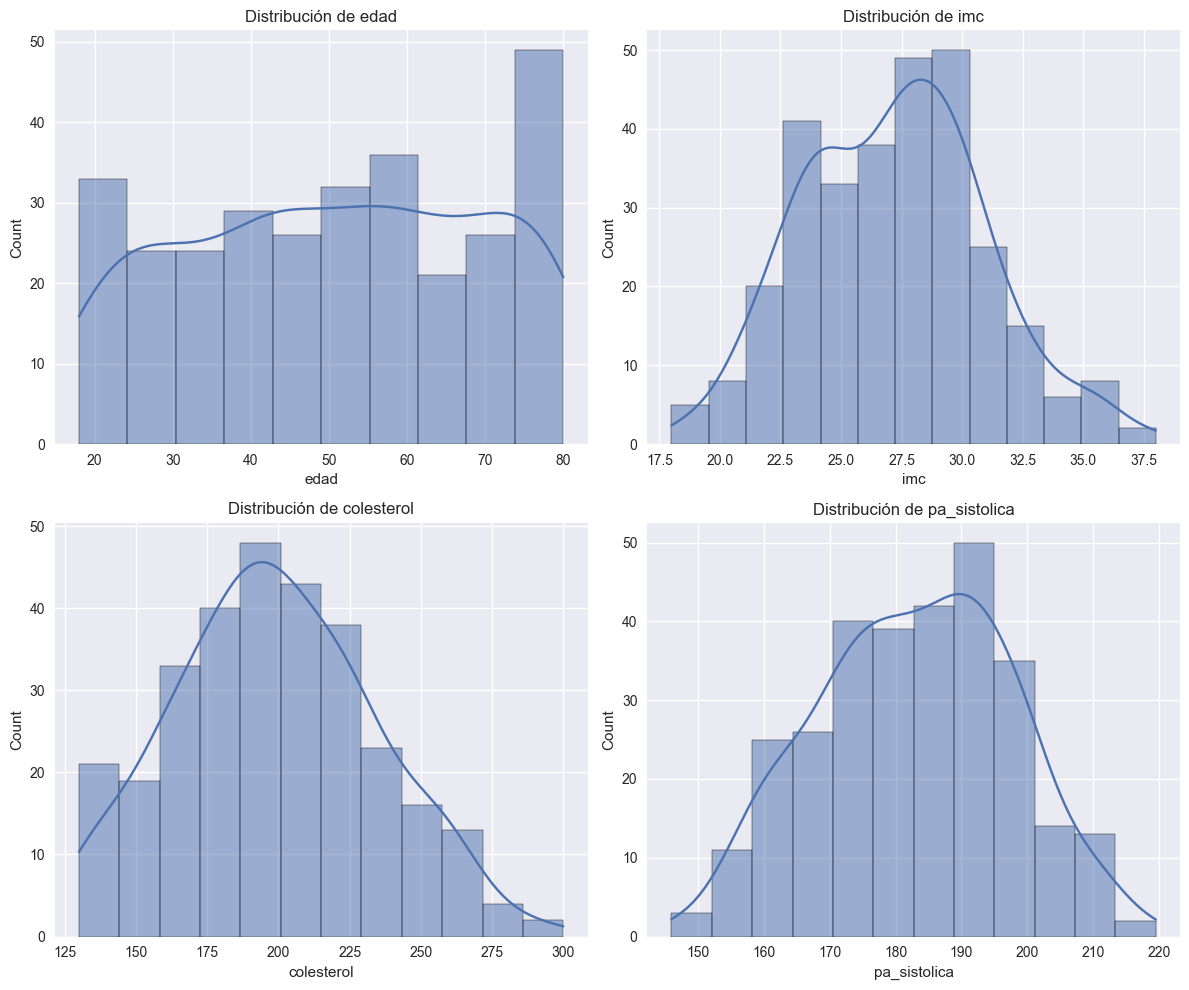

In [14]:
plt.figure(figsize=(12, 10)) 
for i, col in enumerate(['edad', 'imc', 'colesterol', 'pa_sistolica'], 1): 
    plt.subplot(2, 2, i)  # Organiza 4 gráficos en una cuadrícula de 2x2.
    sns.histplot(df[col], kde=True)  # Histograma con curva de densidad.
    plt.title(f'Distribución de {col}') 
plt.tight_layout() 
plt.savefig('distribucion_variables_pa.png')

**6. Matriz de correlación**

'df.corr(): Matriz de correlación. \nsns.heatmap(): Mapa de calor para visualizar correlaciones.'

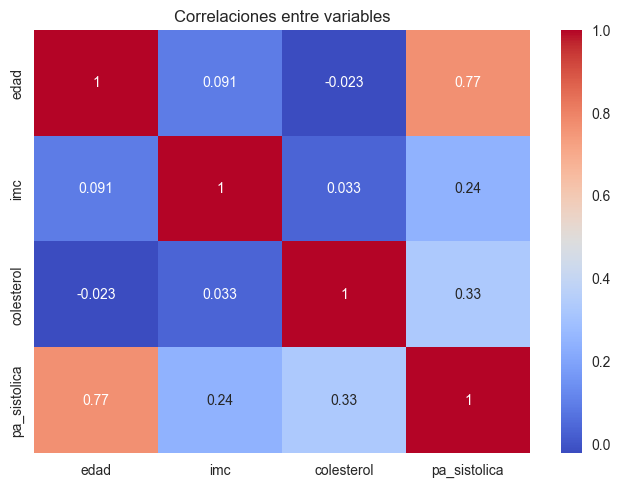

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlaciones entre variables') 
plt.savefig('correlacion_pa.png')

'''df.corr(): Matriz de correlación. 
sns.heatmap(): Mapa de calor para visualizar correlaciones.'''

**7. Regresión lineal simple**

In [16]:
for predictor in ['edad', 'imc', 'colesterol']: 
    X = df[predictor].values.reshape(-1, 1) 
    y = df['pa_sistolica'].values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
    modelo = LinearRegression() 
    modelo.fit(X_train, y_train) 
    y_pred = modelo.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred)

-  X = df[predictor].values.reshape(-1, 1): Convierte la columna en matriz 
2D. 
-  train_test_split(): Divide en conjuntos de entrenamiento y prueba. 
-  LinearRegression().fit(): Entrena el modelo. 
-  predict(): Predice en el conjunto de prueba. 
-  mean_squared_error(): Error cuadrático medio. 
-  r2_score(): R².

**8. Regresión lineal múltiple**

In [17]:
X_multi = df[['edad', 'imc', 'colesterol']] 
y = df['pa_sistolica'] 
modelo_multi = LinearRegression() 
modelo_multi.fit(X_train, y_train) 
y_pred_multi = modelo_multi.predict(X_test)

-  df[['edad', 'imc', 'colesterol']]: Selección de múltiples columnas. 
-  LinearRegression().fit(): Entrena el modelo múltiple.

**9. Predicción para nuevos pacientes**

In [18]:
def predecir_pa_sistolica(edad, imc, colesterol, modelo=modelo_multi): 
    paciente = pd.DataFrame([[edad, imc, colesterol]], columns=['edad', 'imc', 
'colesterol']) 
    pa_predicha = modelo.predict(paciente)[0] 
    return pa_predicha

-  pd.DataFrame([[edad, imc, colesterol]]): Crea DataFrame con datos del 
paciente. 
-  predict(paciente)[0]: Predice la PA sistólica.

Este es el desglose paso a paso del código. ¿Quieres que nos enfoquemos en 
alguna parte en particular o que profundice en algo más?